In [2]:
import numpy as np
from numpy.random import RandomState
import numdifftools as nd
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

RANDOM_STATE = 52
np.random.seed(RANDOM_STATE)
rs = RandomState(RANDOM_STATE)

# <font color = 'red'> ЛР 3. Регуляризация и линейная регрессия. Простейший градиентный спуск. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 17.09.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Регуляризация.  </font>

**Регуляризация** - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Наиболее распростанены два вида регуляризации в линейной регресии это Грёбневая регуляризация (L2) и Лассо регуляризация (L1).

В случае линейной регрессии регуляризация предпалагает наложение штрафа на функцию потерь регрессии по следующим формулам. Все обозначения в терминах предыдущей ЛР.

$$ \mathcal{L1}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}) + \alpha||\overline{w}||_{1}, $$
$$ \mathcal{L2}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}) + \alpha||\overline{w}||_{2}, $$

Далее задача оптимизации решается уже относительно этих функций потерь.



<font color = 'red' size = 5>Задание 1 </font>

1. Используя встроенные функции пакета sklearn, реализуйте небольшие программы моделирующие лин. регрессию с регуляризацией L1 или L2 на искусственных данных. Сделайте выводы о поведении весовых коэффициентов в зависимости от разного количества фич в том числе полиномиальных.
2. Как регуляризация влияет на метрики качества моделей?
3. С какими проблемами вы столкнулись при использовании формулы вычисления весов регрессии из ЛР2? Можно ли их решить регуляризацией? С помощью матриц покажите на примере алгебраический смысл регуляризации.
4. Модифицируйте вашу собственную функцию для нахождения весов регрессии из ЛР2 таким образом, чтобы она соответсвовала функции потерь L2 - регуляризации. Аналитическое решение задачи оптимизации было получено на лекции. Сравните результаты работы вашей функции со встроенной.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [6]:
def generete_1d_data(N = 100):
    x = rs.rand(N)
    y = np.log10(x) + rs.normal(0, 0.1, N)
    return x, y

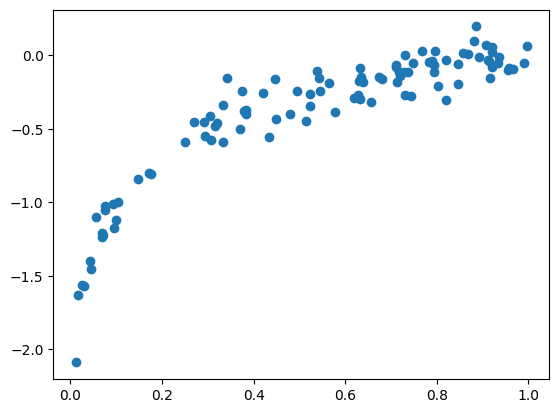

In [24]:
N = 100
x, y = generete_1d_data(N)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()
plt.show()

In [13]:
x.shape, y.shape

((100,), (100,))

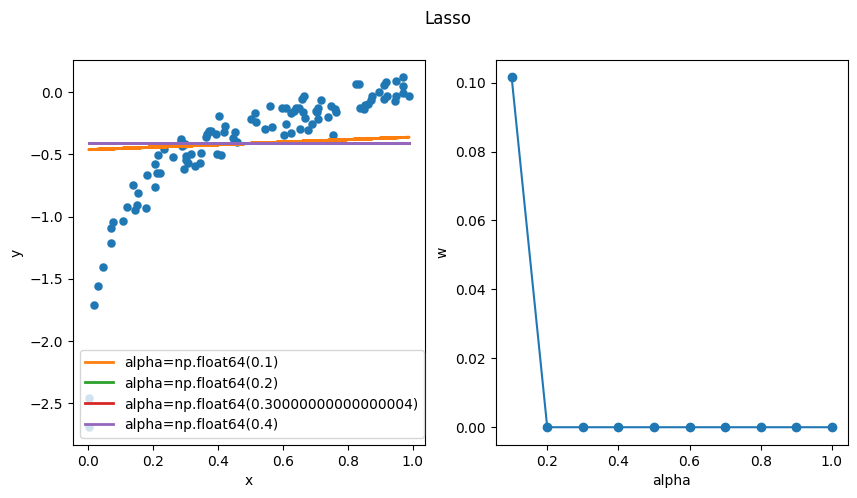

In [ ]:
x, y = generete_1d_data(N)

alphas = np.arange(0.1, 1.1, 0.1)
weights = []
y_preds = []

for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=RANDOM_STATE)
    model.fit(x[:,np.newaxis], y)
    y_preds.append(model.predict(x[:,np.newaxis]))
    weights.append(model.coef_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Lasso')

ax1.scatter(x, y, linewidths=0.1)

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

ax1.set_xlabel('x')
ax1.set_ylabel('y')
for y_pred, alpha, color in zip(y_preds, alphas, colors):
    ax1.plot(x, y_pred, linewidth=2, color=color, label=f'{alpha=}')
ax1.legend()

ax2.set_xlabel('alpha')
ax2.set_ylabel('w')
ax2.scatter(alphas, weights)
ax2.plot(alphas, weights)

plt.show()

In [30]:
def generete_2d_data(N):
    x1, x2 = rs.rand(N) * 2, rs.rand(N) * 2
    x = np.vstack([x1, x2]).T
    y = np.log10(x1) + x2**3 + rs.normal(0, 0.3, N)
    return x1, x2, x, y

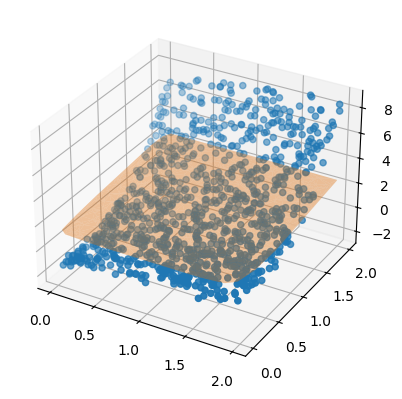

In [ ]:
N = 1000
x1, x2, x, y = generete_2d_data(N);

lasso = Lasso().fit(x, y) 
y_pred = lasso.predict(x)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x1, x2, y)
ax.plot_trisurf(x1, x2, y_pred, color='tab:orange', alpha=0.4)
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=RANDOM_STATE)

In [ ]:
# LASSO

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\3707498145.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


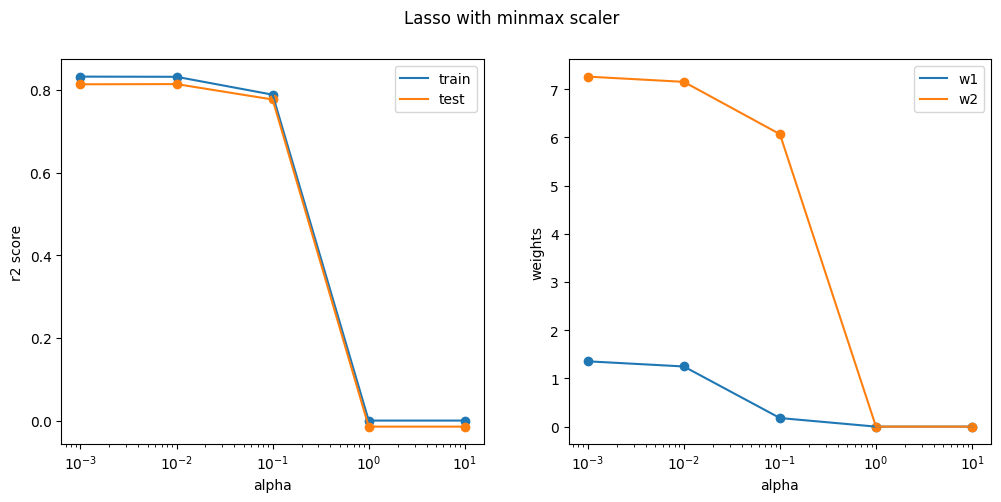

In [37]:
alphas = [10**-3, 10**-2, 10**-1, 1, 10]
scores_train = []
scores_test = []
weights = []

for alpha in alphas:
    model = make_pipeline(MinMaxScaler(), Lasso(alpha=alpha, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][1][1].coef_)


weights = np.array(weights)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Lasso with minmax scaler')

ax1.set_xscale("log")
ax1.set_xlabel('alpha')
ax1.set_ylabel('r2 score')
ax1.scatter(alphas, scores_train)
ax1.plot(alphas, scores_train, label='train')
ax1.scatter(alphas, scores_test)
ax1.plot(alphas, scores_test, label='test')
ax1.legend()

ax2.set_xscale("log")
ax2.set_xlabel('alpha')
ax2.set_ylabel('weights')
ax2.scatter(alphas, weights[::,0])
ax2.plot(alphas, weights[::,0], label='w1')
ax2.scatter(alphas, weights[::,1])
ax2.plot(alphas, weights[::,1], label='w2')
ax2.legend()

fig.show()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\465156122.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


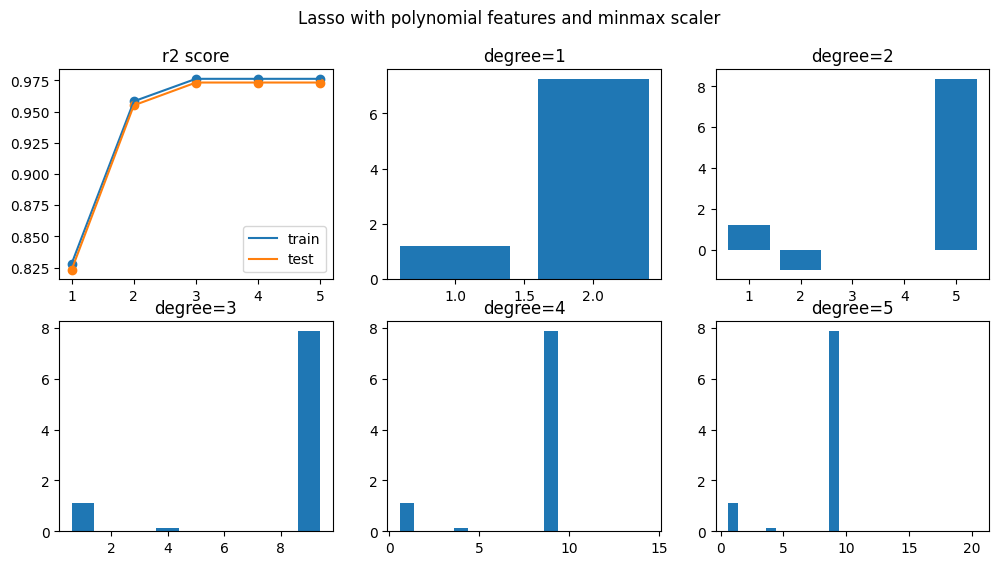

In [16]:
degrees = list(range(1,6))
scores_train = []
scores_test = []
weights = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), 
                          MinMaxScaler(), 
                          Lasso(alpha=10**-2, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][-1][1].coef_)

fig, ((ax11, ax12, ax13), 
      (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Lasso with polynomial features and minmax scaler')

ax11.set_title(f'r2 score')
ax11.scatter(degrees, scores_train)
ax11.plot(degrees, scores_train, label='train')
ax11.scatter(degrees, scores_test)
ax11.plot(degrees, scores_test, label='test')
ax11.legend()

for i, ax in enumerate([ax12, ax13, ax21, ax22, ax23]):
    ax.set_title(f'degree={i+1}')
    ax.bar(range(1,weights[i].shape[0]+1), weights[i])

fig.show()

In [ ]:
#RIDGE

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\2888692762.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


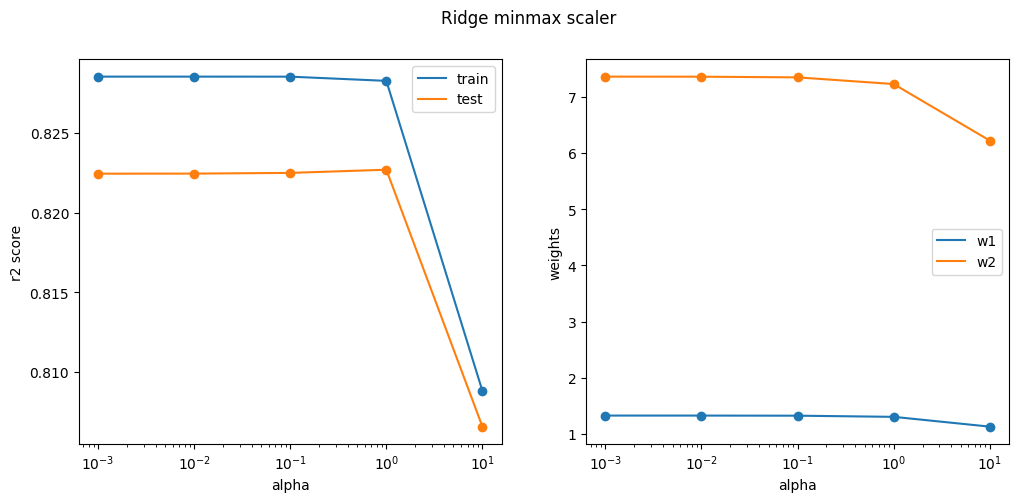

In [17]:
alphas = [10**-3, 10**-2, 10**-1, 1, 10]
scores_train = []
scores_test = []
weights = []

for alpha in alphas:
    model = make_pipeline(MinMaxScaler(), Ridge(alpha=alpha, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][1][1].coef_)


weights = np.array(weights)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Ridge minmax scaler')

ax1.set_xscale("log")
ax1.set_xlabel('alpha')
ax1.set_ylabel('r2 score')
ax1.scatter(alphas, scores_train)
ax1.plot(alphas, scores_train, label='train')
ax1.scatter(alphas, scores_test)
ax1.plot(alphas, scores_test, label='test')
ax1.legend()

ax2.set_xscale("log")
ax2.set_xlabel('alpha')
ax2.set_ylabel('weights')
ax2.scatter(alphas, weights[::,0])
ax2.plot(alphas, weights[::,0], label='w1')
ax2.scatter(alphas, weights[::,1])
ax2.plot(alphas, weights[::,1], label='w2')
ax2.legend()

fig.show()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30112\2730237603.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


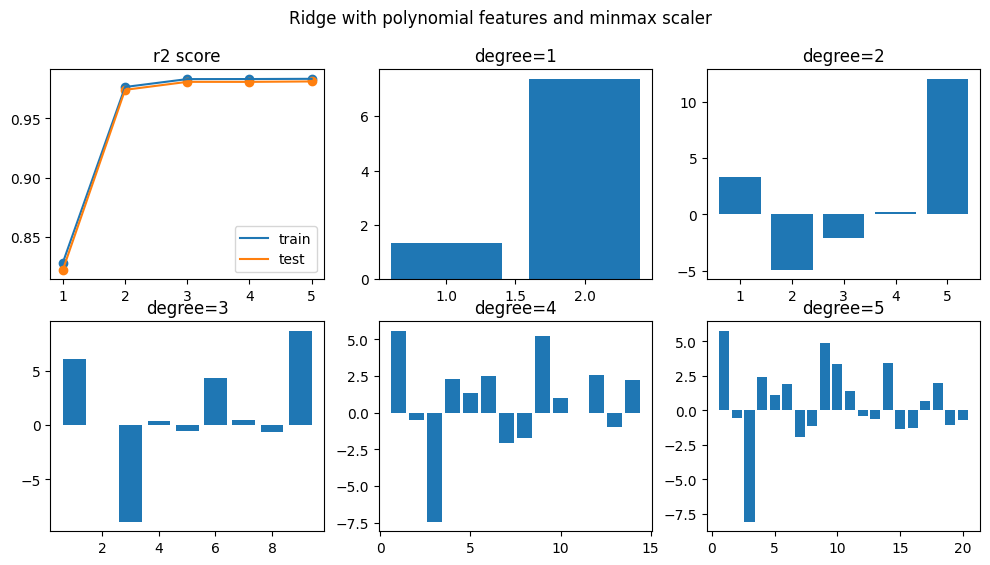

In [18]:
degrees = list(range(1,6))
scores_train = []
scores_test = []
weights = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), 
                          MinMaxScaler(), 
                          Ridge(alpha=10**-2, random_state=RANDOM_STATE))
    model.fit(x_train, y_train)
    scores_train.append(r2_score(y_train, model.predict(x_train)))
    scores_test.append(r2_score(y_test, model.predict(x_test)))
    weights.append(model.get_params()['steps'][-1][1].coef_)

fig, ((ax11, ax12, ax13), 
      (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Ridge with polynomial features and minmax scaler')

ax11.set_title(f'r2 score')
ax11.scatter(degrees, scores_train)
ax11.plot(degrees, scores_train, label='train')
ax11.scatter(degrees, scores_test)
ax11.plot(degrees, scores_test, label='test')
ax11.legend()

for i, ax in enumerate([ax12, ax13, ax21, ax22, ax23]):
    ax.set_title(f'degree={i+1}')
    ax.bar(range(1,weights[i].shape[0]+1), weights[i])

fig.show()

In [ ]:
# Lasso устремляет к нулю веса малозначимых фич. 
# Ridge старается компенсировать одни фичи другими

In [ ]:
# Если повышать коэффициент регуляризации, то метрика качества будет падать

In [ ]:
class RidgeCustom():
    
    def __init__(self, alpha):
        if alpha <= 0:
            raise ValueError
        
        self.weights = None
        self.alpha = alpha

        self.coef_ = None

    def fit(self, X, y):
        X = np.hstack([X, np.ones((X.shape[0], 1), dtype=int)])
        #self.alpha * np.eye(xx.shape[0]) -- регуляризатор
        self.weights = np.linalg.inv((xx:=(X.T @ X)) + self.alpha * np.eye(xx.shape[0])) @ X.T @ y
        self.coef_ = self.weights[:-1]
        return self

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        X = np.hstack([X, np.ones((X.shape[0], 1), dtype=int)])
        return X @ self.weights

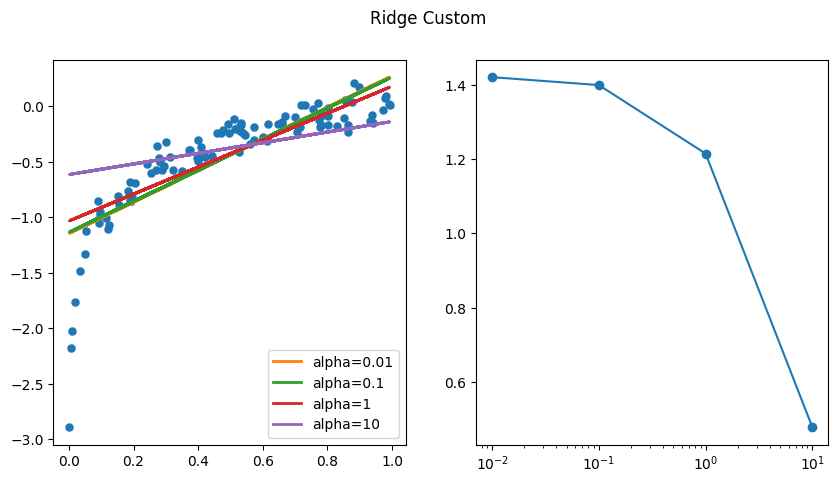

In [38]:
x, y = generete_1d_data()

alphas = [10**-2, 10**-1, 1, 10]
weights = []
y_preds = []

for alpha in alphas:
    model = RidgeCustom(alpha=alpha)
    model.fit(x[:,np.newaxis], y)
    y_preds.append(model.predict(x[:,np.newaxis]))
    weights.append(model.coef_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Ridge Custom')

ax1.scatter(x, y, linewidths=0.1)

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for y_pred, alpha, color in zip(y_preds, alphas, colors):
    ax1.plot(x, y_pred, linewidth=2, color=color, label=f'{alpha=}')
ax1.legend()

ax2.set_xscale("log")
ax2.scatter(alphas, weights)
ax2.plot(alphas, weights)

plt.show()

In [ ]:
#На втором графике уменьшается значение весов, чтобы уменьшить переобучение

## <font color = 'green'> 2. Переобучение. </font>

**Переобучение** - явление, когда построенная модель МО хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах из тестовой выборки. 

<font color = 'orange' size = 3>Пример 1 </font>

Изучите следующий пример.

In [39]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)

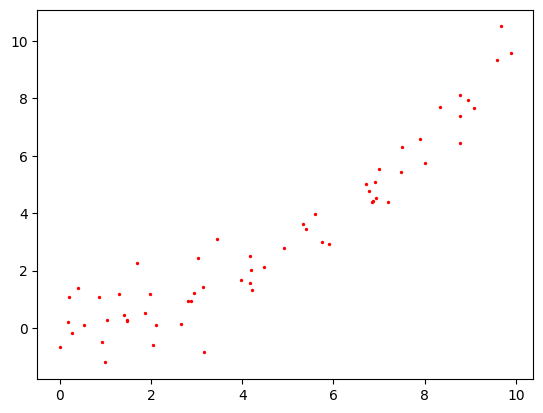

In [40]:
plt.scatter(x, y, c ='red',s=2)

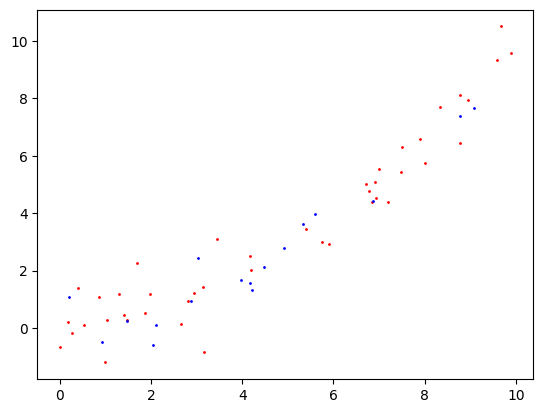

In [41]:
# разделили данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(X_train, y_train, c='red', s=1)
plt.scatter(X_test, y_test, c='blue', s=1)

По наблюдениям из ЛР2 можно сделать вывод, что добавление полиномиальных фич (усложнение модели) повышает точность. Попробуем построить график, на котором увидим зависимость между метрикой R2 и степенью полиномиальных фич в модели. Это параметр можно считать гиперпараметром модели. 

**Гиперпараметры** – это внешние переменные конфигурации, с помощью которых специалисты по данным управляют обучением модели МО. Гиперпараметры (иногда их называют гиперпараметрами модели) настраиваются вручную перед обучением модели. Кстати, коэффициенты $\alpha$ в формулах регуляризаций тоже гиперпараметры.

График зависимости гиперпараметра от метрики качества модели называют  **валидационной кривой**.

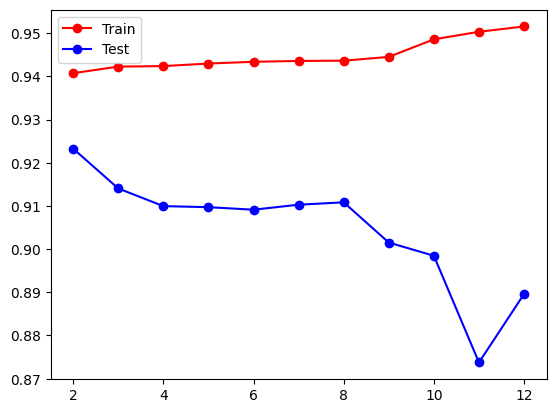

In [42]:
degress = list(range(2, 13))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

Как видим, при увеличении количества полиномиальных фич наблюдаем падение качества валидации на тестовых данных, при росте качества на обучающих - классическое переобучение.

<font color = 'red' size = 5>Задание 2. </font>

1. На искусственных данных смоделируйте переобучение модели линейной регрессии. 
2. С помощью различных моделей регуляризации попробуйте сохранив сложность модели, которая увеличивает качество, избежать переобучения. Потренируйтесь в подборе коэффициентов силы регуляризации. 

In [43]:
def generate_x_squared(N = 150):
    x = 10 * rng.rand(N)
    y = x**2/10 + 0.9 * rng.randn(N)
    return x, y

In [ ]:
#LASSO

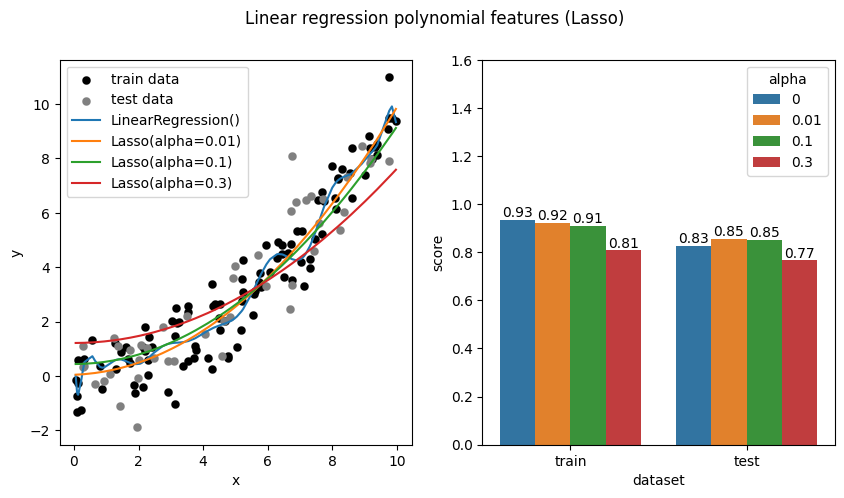

In [47]:
x, y = generate_x_squared()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_STATE)

alphas = [0, 0.01, 0.1, 0.3]

df_scores = pd.DataFrame(columns=['alpha', 'dataset', 'score'])
models = []

for alpha in alphas:
    base_model = Lasso(alpha=alpha) if alpha != 0 else LinearRegression()
    model = make_pipeline(PolynomialFeatures(degree=20), MinMaxScaler(), base_model)
    model.fit(x_train[:,np.newaxis], y_train)
    models.append(model)
    y_pred = model.predict(x_test[:,np.newaxis])
    y_pred_train = model.predict(x_train[:, np.newaxis])
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'train', r2_score(y_train, y_pred_train)]
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'test', r2_score(y_test, y_pred)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Linear regression polynomial features (Lasso)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.scatter(x_train, y_train, linewidths=0.1, label='train data', color='black')
ax1.scatter(x_test, y_test, linewidths=0.1, label='test data', color='grey')

for model in models:
    xy = dict(sorted(zip(x, model.predict(x[:,np.newaxis])), key = lambda o: o[0]))
    x_sorted, y_sorted = xy.keys(), xy.values()
    ax1.plot(x_sorted, y_sorted, label=f'{model.steps[-1][-1]}')

ax1.legend()


ax2 = sns.barplot(df_scores, x="dataset", y="score", hue="alpha")
ax2.set_ylim(top=1.6)
for cont in ax2.containers:
    ax2.bar_label(cont, fontsize=10, fmt='{:,.2f}')
plt.show()

In [ ]:
#RIGDE

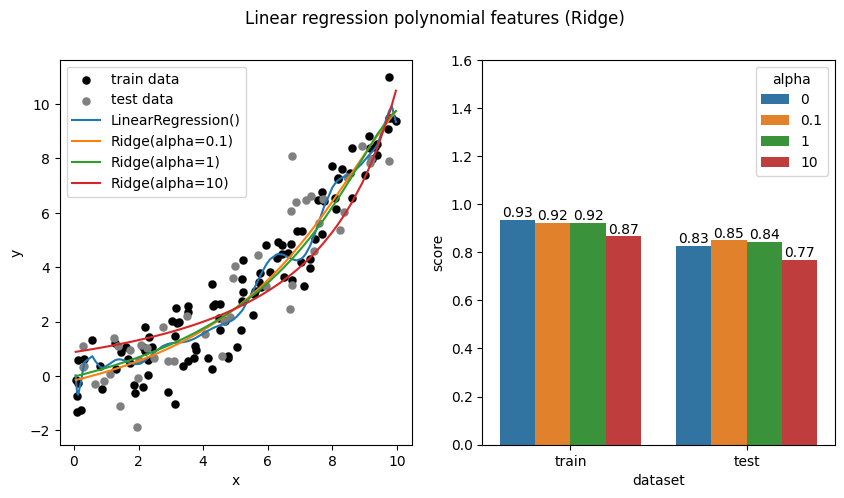

In [49]:
alphas = [0, 0.1, 1, 10]

df_scores = pd.DataFrame(columns=['alpha', 'dataset', 'score'])
models = []

for alpha in alphas:
    base_model = Ridge(alpha=alpha) if alpha != 0 else LinearRegression()
    model = make_pipeline(PolynomialFeatures(degree=20), MinMaxScaler(), base_model)
    model.fit(x_train[:,np.newaxis], y_train)
    models.append(model)
    y_pred = model.predict(x_test[:,np.newaxis])
    y_pred_train = model.predict(x_train[:, np.newaxis])
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'train', r2_score(y_train, y_pred_train)]
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'test', r2_score(y_test, y_pred)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Linear regression polynomial features (Ridge)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.scatter(x_train, y_train, linewidths=0.1, label='train data', color='black')
ax1.scatter(x_test, y_test, linewidths=0.1, label='test data', color='grey')

for model in models:
    xy = dict(sorted(zip(x, model.predict(x[:,np.newaxis])), key = lambda o: o[0]))
    x_sorted, y_sorted = xy.keys(), xy.values()
    ax1.plot(x_sorted, y_sorted, label=f'{model.steps[-1][-1]}')

ax1.legend()


ax2 = sns.barplot(df_scores, x="dataset", y="score", hue="alpha")
ax2.set_ylim(top=1.6)
for cont in ax2.containers:
    ax2.bar_label(cont, fontsize=10, fmt='{:,.2f}')
plt.show()

## <font color = 'green'> 3. Градиентный спуск.  </font>

В предыдущей ЛР мы решили задачу оптимизации, отыскав аналититческое решение в виде формулы. Способ хороший, но не всегда возможный в силу свойств функций и данных. Попробуем вооружиться ещё одним методом решения задач обучения моделей.

<font color = 'red' size = 5>Задание 3. </font>

1. Изучите базовый алгоритм [градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent)  по ссылке или лекционным записям. 
2. Реализуйте простой алгоритм градиентного спуска с постоянным шагом, для решения задачи нахождения минимума некторой функции двух переменных. Графически подтвердите ваши вычисления (на лекции был показан пример). 
3. Используя градиентный спуск, реализуйте собственную функцию обучения для какой либо из изученных ранее регрессий. Тщательно протестируйте. Всегда ли будет сходится (выдавать корректное решение) ваш алгоритм? От каким параметров зависит работа алгоритма? Сравните полученные резульататы со встроенными функциями.
4. Подумайте над улучшением алгоритма с точки зрения сходимости.
 

In [50]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.linalg.norm(X @ w - y) ** 2 / len(X)
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * X.T @ (X @ w - y) / len(X)
    
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.linalg.norm(X @ w - y) ** 2 / len(X) + self.coef * np.linalg.norm(w)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2 * X.T @ (X @ w - y) / len(X) + 2 * self.coef * w

In [51]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> list[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент ("темп обучения")
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    w = w_init
    w_list: list[np.ndarray] = []
    for _ in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        w_list.append(w)
    return w_list

In [52]:
def plot_gd(w_list: list, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

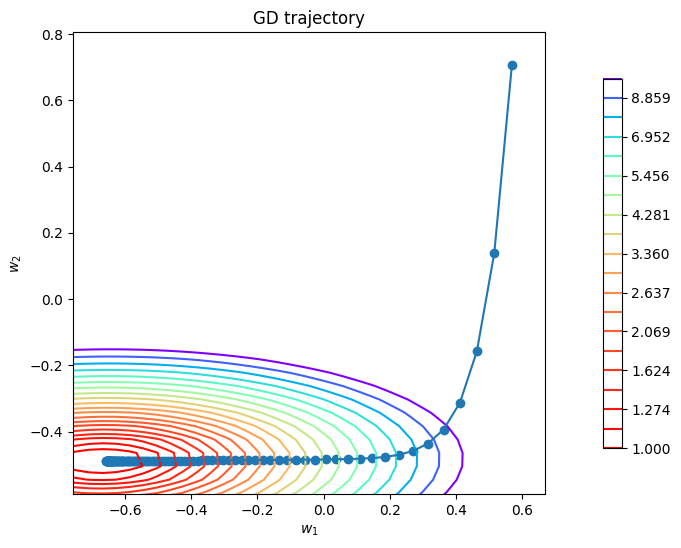

In [58]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 54

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

lr = 0.003
w_list = gradient_descent(w_init, X, y, MSELoss(), lr, 100)
plot_gd(w_list, X, y, MSELoss())

In [59]:
class LinearRegressionGD:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray):
        X, y = np.asarray(X), np.asarray(y)
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        w_init = np.random.uniform(-2, 2, (X.shape[-1]))
        
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, 1000)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        return X @ self.w

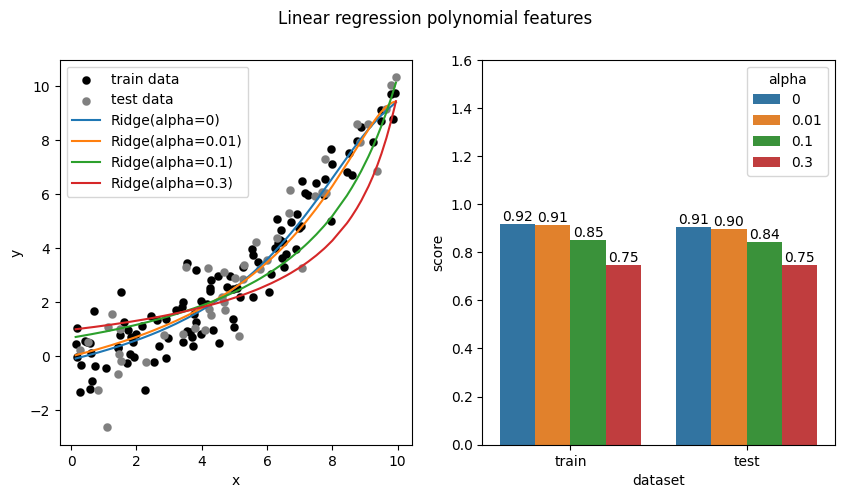

In [55]:
x, y = generate_x_squared()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_STATE)

alphas = [0, 0.01, 0.1, 0.3]

df_scores = pd.DataFrame(columns=['alpha', 'dataset', 'score'])
models = []

for alpha in alphas:
    base_model = LinearRegressionGD(MSEL2Loss(alpha), 0.1)
    model = make_pipeline(PolynomialFeatures(degree=20), MinMaxScaler(), base_model)
    model.fit(x_train[:,np.newaxis], y_train)
    models.append(model)
    y_pred = model.predict(x_test[:,np.newaxis])
    y_pred_train = model.predict(x_train[:, np.newaxis])
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'train', r2_score(y_train, y_pred_train)]
    df_scores.loc[len(df_scores.index)] = [str(alpha), 'test', r2_score(y_test, y_pred)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Linear regression polynomial features')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.scatter(x_train, y_train, linewidths=0.1, label='train data', color='black')
ax1.scatter(x_test, y_test, linewidths=0.1, label='test data', color='grey')

for model, alpha in zip(models, alphas):
    xy = dict(sorted(zip(x, model.predict(x[:,np.newaxis])), key = lambda o: o[0]))
    x_sorted, y_sorted = xy.keys(), xy.values()
    ax1.plot(x_sorted, y_sorted, label=f'Ridge({alpha=})')

ax1.legend()


ax2 = sns.barplot(df_scores, x="dataset", y="score", hue="alpha")
ax2.set_ylim(top=1.6)
for cont in ax2.containers:
    ax2.bar_label(cont, fontsize=10, fmt='{:,.2f}')
plt.show()

<font color = 'red' size = 5>Задание 4. </font>

1. Используя полученные знания о линейной регрессии примените их на реальных данных (два датасета ниже). Применяйте различные методы, стройте валидационные кривые, подбирайте гиперпараметры, преобразуйте данные, для получения лучших по качеству эстиматоров. 
2. При работе используйте не только встроенные, но и свои собственные функции. 
3. Самостоятельно изучите модель регуляризации [Elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) и найдите ей применение.
4. Протестируйте работу Гуссовых базисныч фич. Подвержена ли такая модель переобучениКак регуляризация вляет на них?

Данные.

1. Данные о расходе топлива автомобилями по ссылке [AutoMpg](https://www.kaggle.com/datasets/uciml/autompg-dataset/data)
2. Цены на дома в Бостоне [housing](https://www.kaggle.com/datasets/altavish/boston-housing-dataset).


In [3]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing_df = housing_df.dropna()
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


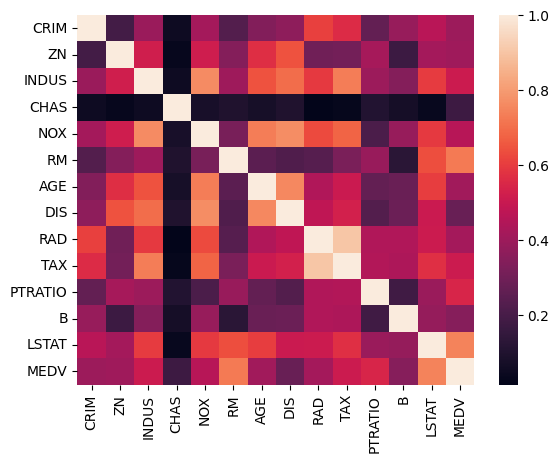

In [6]:
sns.heatmap(np.abs(housing_df.corr()))
plt.show()

In [7]:
def correlated_cols(df: pd.DataFrame, target: str, corr_threshold: float) -> pd.DataFrame:
    columns = df.columns[np.abs(df.corr())[target] > corr_threshold]
    return columns[columns != target]

correlated_cols(housing_df, 'MEDV', 0.5)

Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [9]:
X = housing_df.drop(columns=['MEDV'])
y = housing_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_22736\2089670467.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


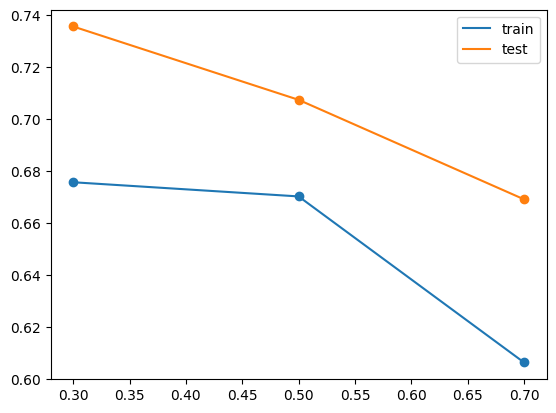

In [10]:
corr_thresholds = [0.3, 0.5, 0.7]

train_scores = []
test_scores = []
for cth in corr_thresholds:
    corr_cols = correlated_cols(housing_df, 'MEDV', cth)
    model = make_pipeline(MinMaxScaler(), LinearRegression()).fit(X_train.loc[:,corr_cols], y_train)
    train_scores.append(r2_score(y_test, model.predict(X_test.loc[:,corr_cols])))
    test_scores.append(r2_score(y_train, model.predict(X_train.loc[:,corr_cols])))

fig, ax = plt.subplots()
ax.scatter(corr_thresholds, train_scores)
ax.plot(corr_thresholds, train_scores, label='train')
ax.scatter(corr_thresholds, test_scores)
ax.plot(corr_thresholds, test_scores, label='test')
ax.legend()
fig.show()

c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.180e+01, tolerance: 2.416e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+02, tolerance: 2.416e+00
  model = cd_fast.enet_coordinate_descent(


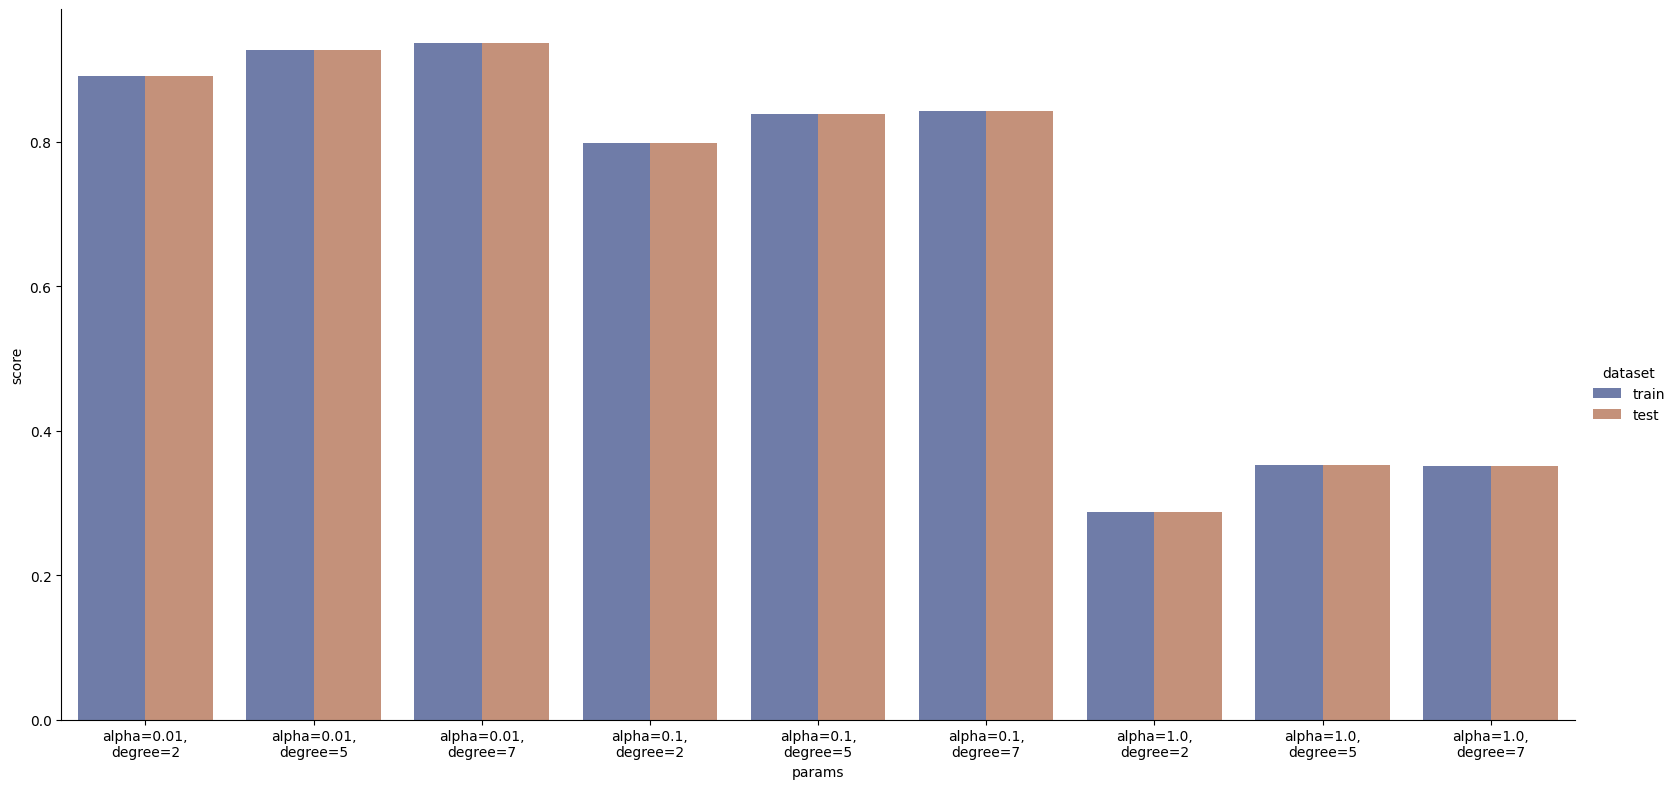

In [11]:
degrees = [2, 5, 7]
alphas = [0.01, 0.1, 1]

df_lasso = pd.DataFrame(columns=['alpha', 'degree', 'dataset', 'score'])
for alpha, degree in product(alphas, degrees):
    model = make_pipeline(PolynomialFeatures(degree), MinMaxScaler(), Lasso(alpha)).fit(X_train, y_train)
    train = r2_score(y_train, model.predict(X_train))
    test = r2_score(y_test, model.predict(X_test))
    df_lasso.loc[len(df_lasso.index)] = [alpha, degree, 'train', train]
    df_lasso.loc[len(df_lasso.index)] = [alpha, degree, 'test', train]

df_lasso['params'] = 'alpha=' + df_lasso['alpha'].map(str) + ',\ndegree=' +  df_lasso['degree'].map(str)

sns.catplot(
    data=df_lasso, kind="bar",
    x="params", y="score", hue="dataset",
    errorbar="sd", palette="dark", alpha=.6, height=8, aspect=2
)

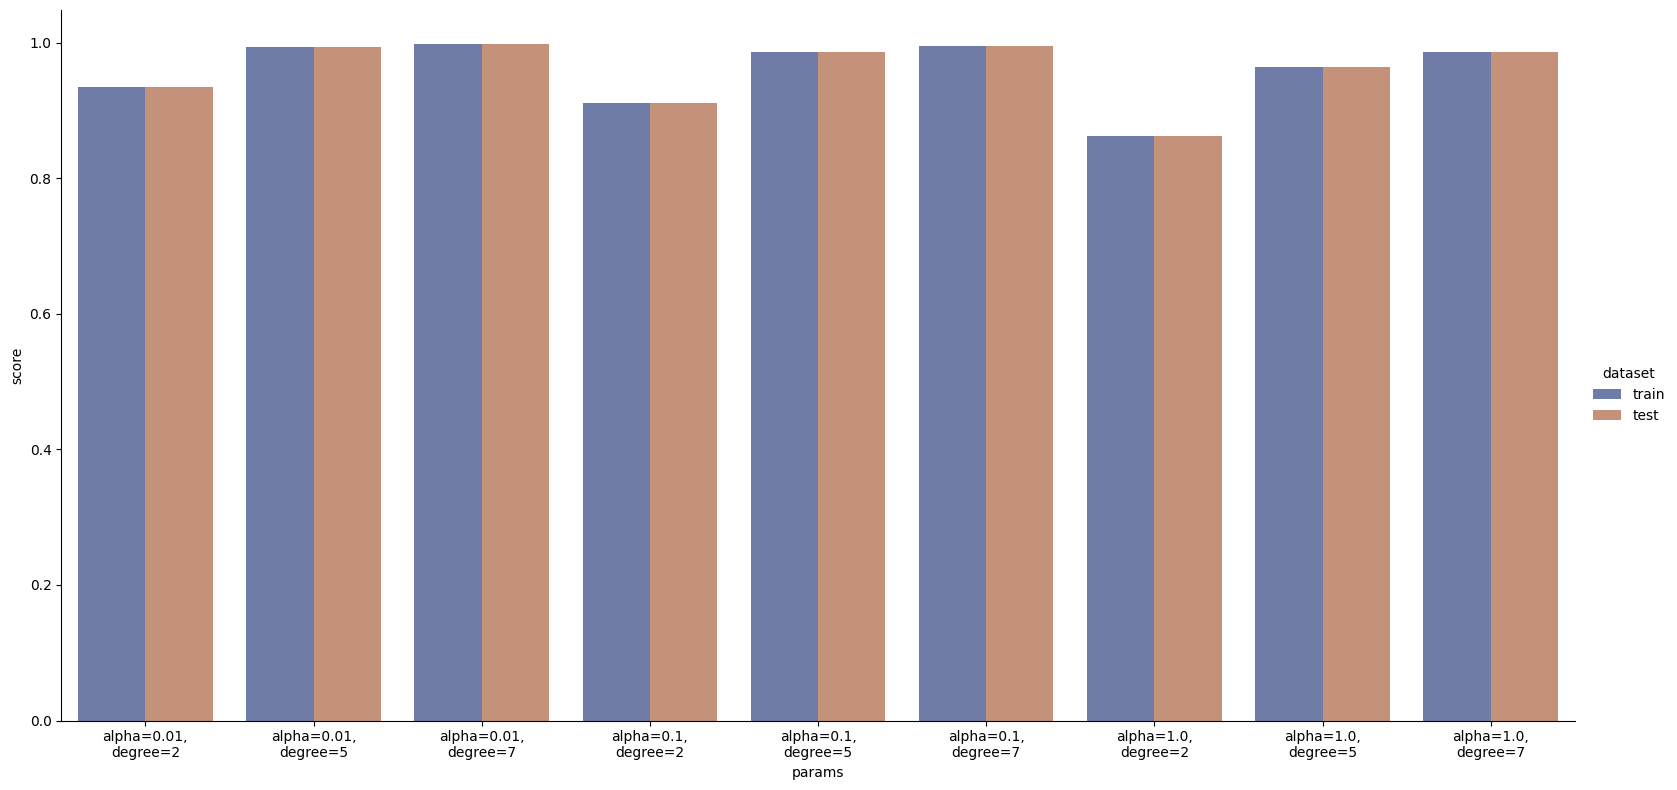

In [12]:
degrees = [2, 5, 7]
alphas = [0.01, 0.1, 1]

df_ridge = pd.DataFrame(columns=['alpha', 'degree', 'dataset', 'score'])
for alpha, degree in product(alphas, degrees):
    model = make_pipeline(PolynomialFeatures(degree), MinMaxScaler(), Ridge(alpha)).fit(X_train, y_train)
    train = r2_score(y_train, model.predict(X_train))
    test = r2_score(y_test, model.predict(X_test))
    df_ridge.loc[len(df_ridge.index)] = [alpha, degree, 'train', train]
    df_ridge.loc[len(df_ridge.index)] = [alpha, degree, 'test', train]
    


df_ridge['params'] = 'alpha=' + df_ridge['alpha'].map(str) + ',\ndegree=' +  df_ridge['degree'].map(str)

sns.catplot(
    data=df_ridge, kind="bar",
    x="params", y="score", hue="dataset",
    errorbar="sd", palette="dark", alpha=.6, height=8, aspect=2
)

c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.556e+02, tolerance: 2.416e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e+02, tolerance: 2.416e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

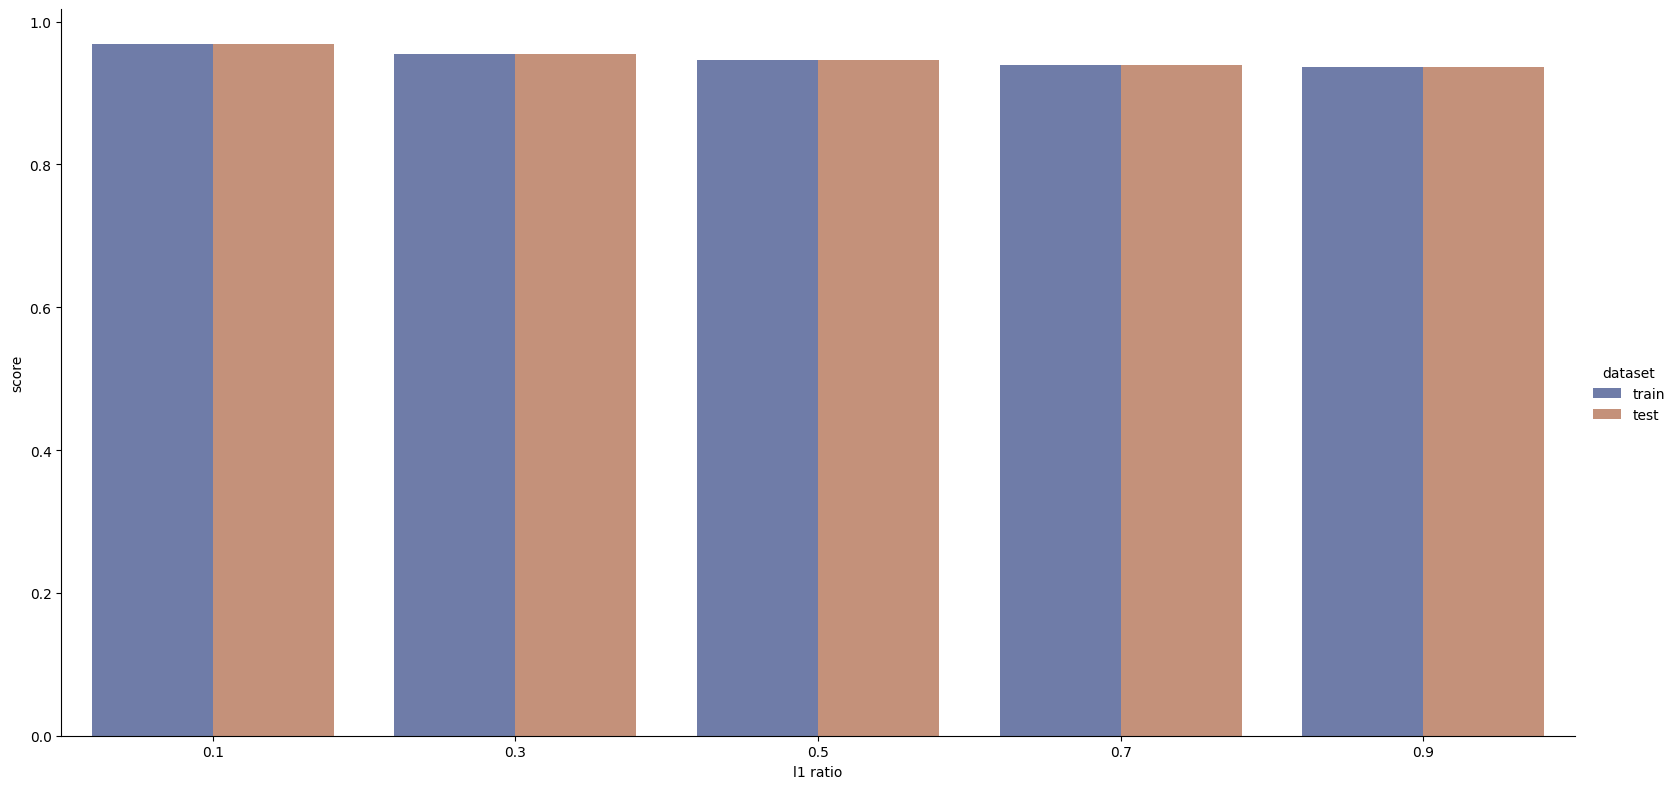

In [ ]:
from sklearn.linear_model import ElasticNet

ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

df_elastic = pd.DataFrame(columns=['l1 ratio', 'dataset', 'score'])
for comp_mult in ratios:
    model = make_pipeline(PolynomialFeatures(7), MinMaxScaler(), ElasticNet(0.01, l1_ratio=comp_mult)).fit(X_train, y_train)
    train = r2_score(y_train, model.predict(X_train))
    test = r2_score(y_test, model.predict(X_test))
    df_elastic.loc[len(df_elastic.index)] = [comp_mult, 'train', train]
    df_elastic.loc[len(df_elastic.index)] = [comp_mult, 'test', train]


sns.catplot(
    data=df_elastic, kind="bar",
    x="l1 ratio", y="score", hue="dataset",
    errorbar="sd", palette="dark", alpha=.6, height=8, aspect=2
)

<font color = 'red' size = 5>Задание 5. </font>